In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
symbols = {'00':(0, 0), '01':(0,np.pi/2), '10':(np.pi/2, 0), '11': (np.pi/2, np.pi/2)}
info = ['10', '01', '10', '11']

In [76]:
A_c = 1
f_c = 5.86 #Carrier frequency
f_m = 1 #Modulator frequency
# f_m = 1.0e6
# f_c = 5.86e6
m = 1
t_max = 5
# t_max = 4/f_c
fs = 1000
# t = np.linspace(0, 1, 1000)

In [77]:
t = np.linspace(0, t_max, 4000)
time_segments = np.array_split(t, 4)
signal_I = list()
signal_Q = list()
for i in range(len(time_segments)):
    signal_I.append(np.cos((2*np.pi*f_m*time_segments[i])+symbols[info[i]][0]))
    signal_Q.append(np.sin((2*np.pi*f_m*time_segments[i])+symbols[info[i]][1]))

carrier_I = np.sin(2*np.pi*f_c*t)
carrier_Q = np.cos(2*np.pi*f_c*t)

In [78]:
signal_I = np.array(signal_I).reshape(4000,)
signal_Q = np.array(signal_Q).reshape(4000,)

In [79]:
signal_I.shape, carrier_I.shape

((4000,), (4000,))

In [80]:
i_modulated = signal_I*carrier_I
q_modulated = signal_Q*carrier_Q
qpsk_signal = i_modulated + q_modulated

In [81]:
qpsk_s_5mhz_offset = qpsk_signal * 0.0501 #Valor correspondiente a offset de 5 MHz
qpsk_s_4_75mhz_offset = qpsk_signal * 0.2239 #Valor correspondiente a offset de 4.75 MHz

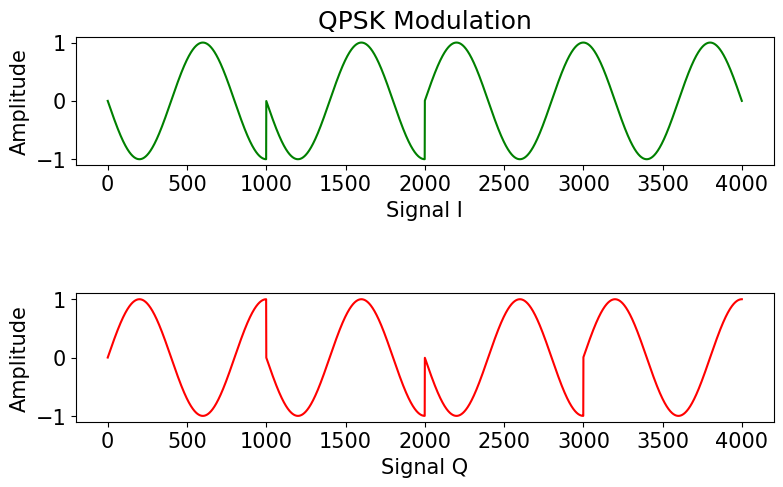

In [82]:
plt.subplot(2,1,1)
plt.title('QPSK Modulation')
plt.plot(signal_I, 'g')
plt.ylabel('Amplitude')
plt.xlabel('Signal I')

plt.subplot(2,1,2)
plt.plot(signal_Q, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Signal Q')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)

fig = plt.gcf()
fig.set_size_inches(9, 5)
#fig.savefig('AM.png', dpi=100)
plt.show()

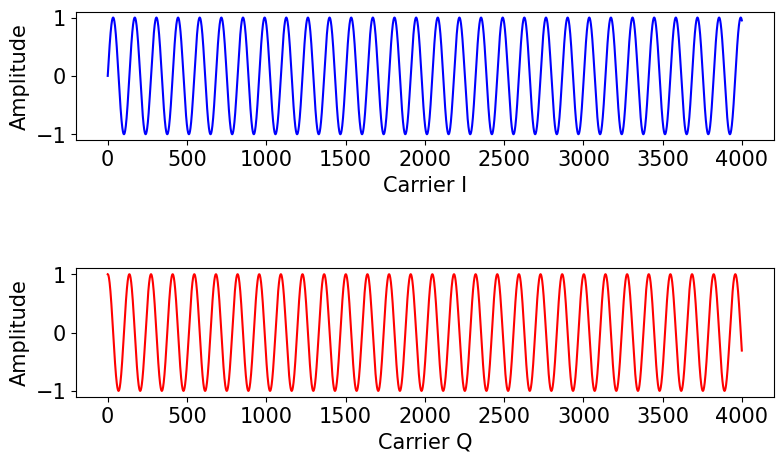

In [83]:
plt.subplot(2,1,1)
plt.plot(carrier_I, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Carrier I')

plt.subplot(2,1,2)
plt.plot(carrier_Q, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Carrier Q')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

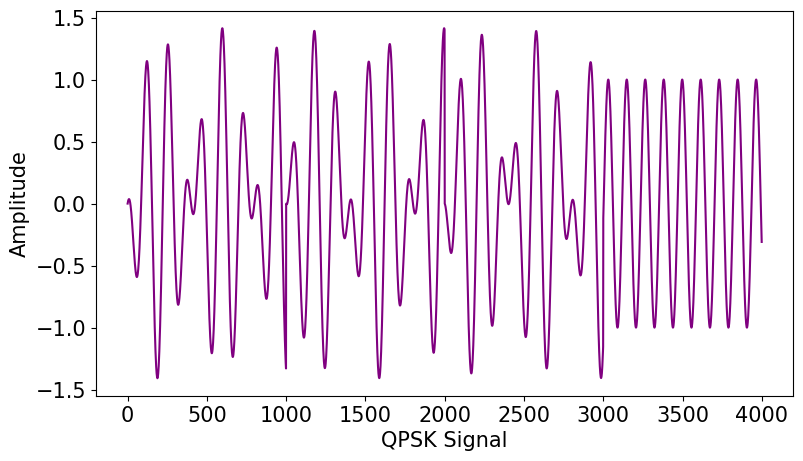

In [84]:
plt.plot(qpsk_signal, 'purple')
plt.ylabel('Amplitude')
plt.xlabel('QPSK Signal')

plt.rc('font', size=15)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

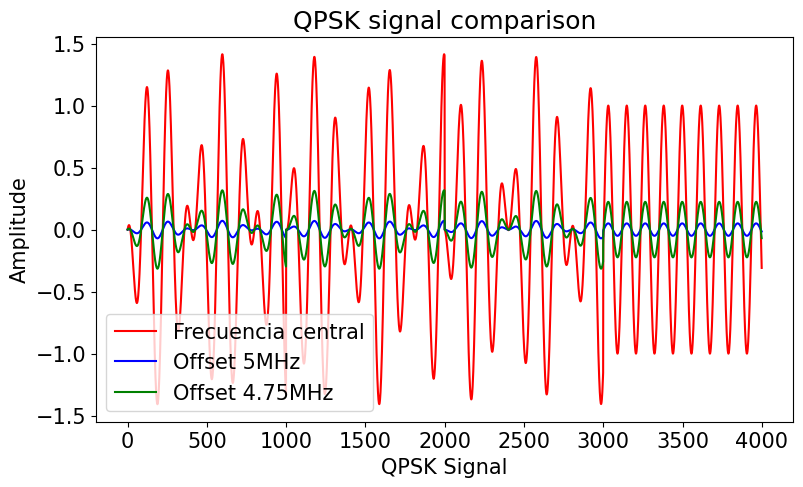

In [85]:
plt.title('QPSK signal comparison')
plt.plot(qpsk_signal, 'r', label = 'Frecuencia central')
plt.plot(qpsk_s_5mhz_offset, 'b', label = 'Offset 5MHz')
plt.plot(qpsk_s_4_75mhz_offset, 'g', label = 'Offset 4.75MHz')
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('QPSK Signal')
plt.rc('font', size=15)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()